## Fuentes
### Fuente nº1. Wine Information
Incluye información de más de 20.000 vinos. Incluye variedad de uva, tipo de vino, uso, vol. alcohol, temperatura para beberlo, dulcura, acidez, cuerpo, taninos precio (en wones), año de producción y ml/botella
url = 'https://www.kaggle.com/datasets/dev7halo/wine-information?select=cleansingWine.csv'

### Fuente nº2. Spanish Wine Quality Dataset
Incluye el precio en euros, viñedo, rating, numero de reviews, tipo, cuerpo y acidez
url = 'https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset?select=wines_SPA.csv'

### Fuente nº3. Vivino Wine Data: Top 10 Countries ex-China
puede venir bien para sacar el tipo de uva. es un webscrapping de vivino
url = 'https://www.kaggle.com/datasets/joshuakalobbowles/vivino-wine-data-top-10-countries-exchina?select=vivino_top_ten.csv'

### Fuente nº4. Wine Rating & Price
dividido en 4 archivos. precio e euros rating y numero de ratings. lo dejo por si acaso
url = 'https://www.kaggle.com/datasets/budnyak/wine-rating-and-price'

### Fuente nº5. Wine Reviews -> **Fuente definitiva**
wine reviews with variety, location, winery, price, and description
url = 'https://www.kaggle.com/datasets/manyregression/updated-wine-enthusiast-review/data'

## Documentación complementaria
https://www.bodegasfos.com/blog/guias-sistemas-de-puntuacion/#:~:text=96%2D100%20puntos%3A%20Vino%20excepcional,70%2D79%20puntos%3A%20Vino%20aceptable

### Librerías importadas

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
import re
import numpy as np
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
import matplotlib as mpl
from sklearn.ensemble import RandomForestRegressor, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.model_selection import GridSearchCV

### Fuente nº1. Wine Information
Incluye información de más de 20.000 vinos. Incluye variedad de uva, tipo de vino, uso, vol. alcohol, temperatura para beberlo, dulcura, acidez, cuerpo, taninos precio (en wones), año de producción y ml/botella.

In [64]:
url = 'wine/cleansingWine.csv'
w_if = pd.read_csv(url, index_col=0)
w_if.head(3)

C:\Users\anusk\AppData\Local\Temp\ipykernel_12876\4042625127.py:2: DtypeWarning: Columns (8,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  w_if = pd.read_csv(url, index_col=0)


,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,...,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,137197,Altair,Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Carmenere,...,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750
1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Merlot,...,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750
2,137199,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,Cinsault,...,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0,0,750


In [65]:
w_if.columns

Index(['id', 'name', 'producer', 'nation', 'local1', 'local2', 'local3',
       'local4', 'varieties1', 'varieties2', 'varieties3', 'varieties4',
       'varieties5', 'varieties6', 'varieties7', 'varieties8', 'varieties9',
       'varieties10', 'varieties11', 'varieties12', 'type', 'use', 'abv',
       'degree', 'sweet', 'acidity', 'body', 'tannin', 'price', 'year', 'ml'],
      dtype='object')

In [66]:
w_if = w_if.drop(columns=(['varieties3', 'varieties4',
       'varieties5', 'varieties6', 'varieties7', 'varieties8', 'varieties9',
       'varieties10', 'varieties11', 'varieties12',"local4"]), axis=1)

In [67]:
w_if.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21605 entries, 0 to 21604
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          21605 non-null  int64 
 1   name        21605 non-null  object
 2   producer    21605 non-null  object
 3   nation      21603 non-null  object
 4   local1      20705 non-null  object
 5   local2      11145 non-null  object
 6   local3      3591 non-null   object
 7   varieties1  21256 non-null  object
 8   varieties2  7518 non-null   object
 9   type        21547 non-null  object
 10  use         21591 non-null  object
 11  abv         14459 non-null  object
 12  degree      14460 non-null  object
 13  sweet       21603 non-null  object
 14  acidity     21592 non-null  object
 15  body        21592 non-null  object
 16  tannin      21592 non-null  object
 17  price       21605 non-null  int64 
 18  year        21605 non-null  int64 
 19  ml          21605 non-null  int64 
dtypes: int64(4)

In [68]:
w_if

,id,name,producer,nation,local1,local2,local3,varieties1,varieties2,type,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,137197,Altair,Altair,Chile,Rapel Valley,NaN,NaN,Cabernet Sauvignon,Carmenere,Red,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750
1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,Cabernet Sauvignon,Merlot,Red,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750
2,137199,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,Carignan,Cinsault,Red,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0,0,750
3,137200,Baron du Val White,Baron du Val,France,NaN,NaN,NaN,Carignan,Ugni​ blanc,White,Table,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0,0,750
4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,NaN,NaN,Cabernet Sauvignon,NaN,Red,Table,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0,2003,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21600,168703,"Besserat de Bellefon, Bleu Brut",Besserat de Bellefon,France,Champagne,NaN,NaN,Pinot Meunier,Chardonnay,Sparkling,"Appetizer, Table",NaN,NaN,SWEET1,ACIDITY5,BODY2,TANNIN1,128000,0,750
21601,168704,"Leopard’s Leap, Cuvee Brut",Leopards Leap,the Republic of South Africa,Coastal Region,Paarl,NaN,Chardonnay,Chenin Blanc,Sparkling,"Appetizer, Table",12~13,6~8,SWEET1,ACIDITY5,BODY2,TANNIN1,40000,0,750
21602,168705,"Leopard’s Leap, Chardonnay Pinot Noir",Leopards Leap,the Republic of South Africa,Western Cape,NaN,NaN,Chardonnay,Pinot Noir,Rose,"Appetizer, Table",12~13,10~12,SWEET1,ACIDITY3,BODY2,TANNIN1,40000,2020,750
21603,168706,"Leopard’s Leap, Chardonnay",Leopards Leap,the Republic of South Africa,Coastal Region,Paarl,Wellington,Chardonnay,NaN,White,"Appetizer, Table",12~13,10~12,SWEET1,ACIDITY3,BODY2,TANNIN1,40000,2020,750


In [69]:
w_if["sweet"] = w_if["sweet"].str.extract(r'(\d+\.?\d*)').astype(float)
w_if["acidity"] = w_if["acidity"].str.extract(r'(\d+\.?\d*)').astype(float)
w_if["body"] = w_if["body"].str.extract(r'(\d+\.?\d*)').astype(float)
w_if["tannin"] = w_if["tannin"].str.extract(r'(\d+\.?\d*)').astype(float)

In [70]:
w_if.head(3)

,id,name,producer,nation,local1,local2,local3,varieties1,varieties2,type,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,137197,Altair,Altair,Chile,Rapel Valley,NaN,NaN,Cabernet Sauvignon,Carmenere,Red,Table,14~15,17~19,1.0,4.0,5.0,4.0,220000,2014,750
1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,Cabernet Sauvignon,Merlot,Red,Table,14~15,16~18,1.0,3.0,4.0,4.0,110000,2016,750
2,137199,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,Carignan,Cinsault,Red,Table,11~12,15~17,2.0,3.0,2.0,2.0,0,0,750


In [71]:
w_if["type"].unique()

array(['Red', 'White', 'Rose', nan, 'Fortified', 'Sparkling', 'Etc',
       'Hard', 'Korean', 'Sake/Rice'], dtype=object)

In [73]:
w_if.describe()

,id,sweet,acidity,body,tannin,price,year,ml
count,21605.000000,21603.000000,21592.000000,21592.000000,21592.000000,2.160500e+04,21605.000000,21605.000000
mean,153998.163666,1.269592,3.380743,3.331882,2.491293,9.266349e+04,1769.949502,743.899236
std,9200.852348,0.831568,0.780147,0.894917,1.257139,2.521565e+05,654.831502,145.181162
min,137197.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,146645.000000,1.000000,3.000000,3.000000,1.000000,0.000000e+00,2006.000000,750.000000
50%,153748.000000,1.000000,3.000000,3.000000,3.000000,3.000000e+04,2012.000000,750.000000
75%,162431.000000,1.000000,4.000000,4.000000,3.000000,8.900000e+04,2016.000000,750.000000
max,168707.000000,5.000000,5.000000,5.000000,5.000000,8.000000e+06,2020.000000,6000.000000


<Axes: >

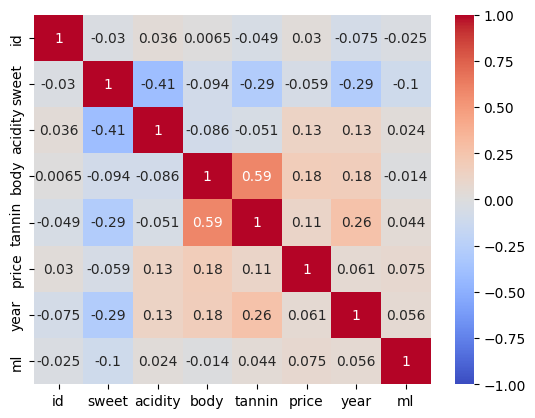

In [74]:
sns.heatmap(w_if.corr(numeric_only=True), annot=True, vmin=-1, cmap="coolwarm")

### Fuente nº2. Spanish Wine Quality Dataset
Incluye el precio en euros, viñedo, rating, numero de reviews, tipo, cuerpo y acidez

In [75]:
url = 'wine/wines_SPA.csv'
w_sp = pd.read_csv(url)
w_sp.head(3)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0


In [76]:
w_sp["type"].unique()

array(['Toro Red', 'Tempranillo', 'Ribera Del Duero Red', 'Pedro Ximenez',
       'Red', 'Sherry', 'Priorat Red', 'Rioja Red', 'Rioja White',
       'Grenache', nan, 'Cava', 'Verdejo', 'Syrah', 'Monastrell',
       'Mencia', 'Sparkling', 'Montsant Red', 'Albarino', 'Chardonnay',
       'Cabernet Sauvignon', 'Sauvignon Blanc'], dtype=object)

In [77]:
w_sp.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [78]:
w_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


<Axes: >

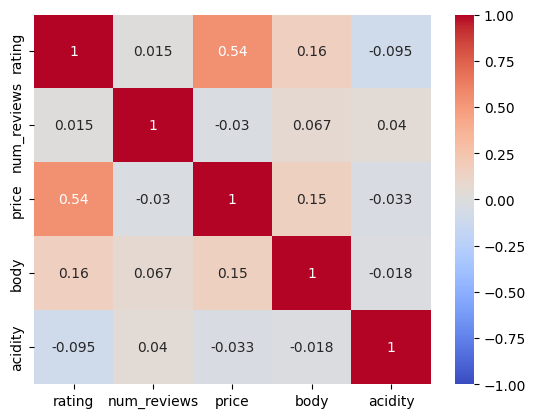

In [79]:
sns.heatmap(w_sp.corr(numeric_only=True), annot=True, vmin=-1, cmap="coolwarm")

### Fuente nº3. Vivino Wine Data: Top 10 Countries ex-China
puede venir bien para sacar el tipo de uva. es un webscrapping de vivino

In [80]:
url = 'wine/vivino_top_ten.csv'
vvno_t10 = pd.read_csv(url)
vvno_t10.head(3)

,Winery,Year,Wine_ID,Wine,Rating,Reviews,Price,Region,Primary_Grape,Natural,Country,Style,Country_Code
0,Baron de Ley,2020,8729994,Rosado de Lágrima 2020,4.2,42,7.15,La Rioja,Malbec,False,Argentina,Rose,ARG
1,New Age,N.V.,7704484,Sweet White N.V.,3.9,5672,7.43,Mendoza,Malbec,False,Argentina,White,ARG
2,Alamos,2018,68764,Malbec Rosé 2018,3.9,384,8.00,Valle de Uco,Malbec,False,Argentina,Rose,ARG


In [81]:
vvno_t10.describe()

,Wine_ID,Rating,Reviews,Price
count,1.220500e+04,12205.000000,12205.000000,12205.000000
mean,2.122684e+06,3.919992,498.468005,42.610824
std,2.068168e+06,0.322382,2333.570088,116.172437
min,5.310000e+02,1.900000,25.000000,2.070000
25%,1.135203e+06,3.700000,55.000000,8.950000
50%,1.425545e+06,3.900000,122.000000,17.900000
75%,2.486838e+06,4.100000,330.000000,37.000000
max,1.020577e+07,4.900000,114425.000000,6511.310000


In [82]:
vvno_t10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Winery         12205 non-null  object 
 1   Year           12190 non-null  object 
 2   Wine_ID        12205 non-null  int64  
 3   Wine           12205 non-null  object 
 4   Rating         12205 non-null  float64
 5   Reviews        12205 non-null  int64  
 6   Price          12205 non-null  float64
 7   Region         12205 non-null  object 
 8   Primary_Grape  12205 non-null  object 
 9   Natural        12205 non-null  bool   
 10  Country        12205 non-null  object 
 11  Style          12205 non-null  object 
 12  Country_Code   12205 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 1.1+ MB


<Axes: >

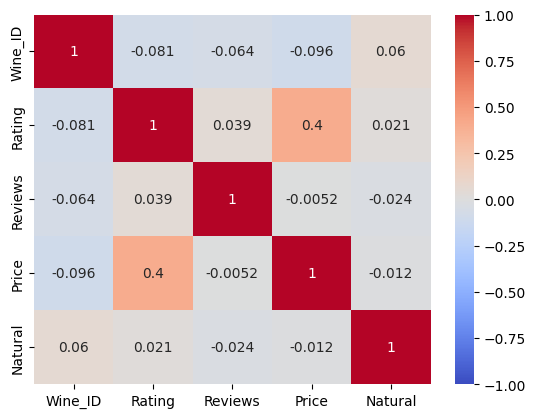

In [84]:
sns.heatmap(vvno_t10.corr(numeric_only=True), annot=True, vmin=-1, cmap="coolwarm")

### Fuente nº5. Wine Reviews -> **Fuente definitiva**
wine reviews with variety, location, winery, price, and description

In [91]:
url = 'wine/winemag-data-2017-2020.csv'
wine_rev2 = pd.read_csv(url)
wine_rev2.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_photo,taster_twitter_handle,title,variety,vintage,winery
0,Portugal,This is a deliciously creamy wine with light w...,Assobio Branco,87,14.0,Douro,NaN,NaN,Roger Voss,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@vossroger,Quinta dos Murças 2016 Assobio Branco White (D...,Portuguese White,2016,Quinta dos Murças
1,US,"Black plum juice, black pepper, caramel and sm...",NaN,87,25.0,California,Paso Robles,Central Coast,Matt Kettmann,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@mattkettmann,Western Slope 2014 Cabernet Sauvignon (Paso Ro...,Cabernet Sauvignon,2014,Western Slope
2,Georgia,Aromas of green apple and white flowers prepar...,NaN,87,14.0,Lechkhumi,NaN,NaN,Mike DeSimone,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@worldwineguys,Teliani Valley 2015 Tsolikouri (Lechkhumi),Tsolikouri,2015,Teliani Valley


In [93]:
wine_rev2.describe()

,points,price
count,81115.000000,76468.000000
mean,89.383135,39.181618
std,2.918882,48.177663
min,80.000000,4.000000
25%,87.000000,19.000000
50%,89.000000,29.000000
75%,91.000000,47.000000
max,100.000000,3400.000000


In [94]:
wine_rev2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81115 entries, 0 to 81114
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                81110 non-null  object 
 1   description            81115 non-null  object 
 2   designation            59796 non-null  object 
 3   points                 81115 non-null  int64  
 4   price                  76468 non-null  float64
 5   province               81110 non-null  object 
 6   region_1               68202 non-null  object 
 7   region_2               31221 non-null  object 
 8   taster_name            80965 non-null  object 
 9   taster_photo           80965 non-null  object 
 10  taster_twitter_handle  80039 non-null  object 
 11  title                  81115 non-null  object 
 12  variety                81115 non-null  object 
 13  vintage                81115 non-null  object 
 14  winery                 81115 non-null  object 
dtypes:

In [105]:
wine_rev2["vintage"] = np.where(wine_rev2["vintage"] == "NV", 0, wine_rev2["vintage"])
wine_rev2["vintage"] = wine_rev2["vintage"].astype(int)

In [103]:
wine_rev2['country_clas'] = pd.factorize(wine_rev2['country'])[0]
wine_rev2['province_clas'] = pd.factorize(wine_rev2['province'])[0]
wine_rev2['designation_clas'] = pd.factorize(wine_rev2['designation'])[0]
wine_rev2['winery_clas'] = pd.factorize(wine_rev2['winery'])[0]
wine_rev2['variety_clas'] = pd.factorize(wine_rev2['variety'])[0]
wine_rev2['region_1_clas'] = pd.factorize(wine_rev2['region_1'])[0]
wine_rev2['region_2_clas'] = pd.factorize(wine_rev2['region_2'])[0]
wine_rev2['taster_name_clas'] = pd.factorize(wine_rev2['taster_name'])[0]

In [106]:
wine_rev2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81115 entries, 0 to 81114
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                81110 non-null  object 
 1   description            81115 non-null  object 
 2   designation            59796 non-null  object 
 3   points                 81115 non-null  int64  
 4   price                  76468 non-null  float64
 5   province               81110 non-null  object 
 6   region_1               68202 non-null  object 
 7   region_2               31221 non-null  object 
 8   taster_name            80965 non-null  object 
 9   taster_photo           80965 non-null  object 
 10  taster_twitter_handle  80039 non-null  object 
 11  title                  81115 non-null  object 
 12  variety                81115 non-null  object 
 13  vintage                81115 non-null  int64  
 14  winery                 81115 non-null  object 
 15  co

<Axes: >

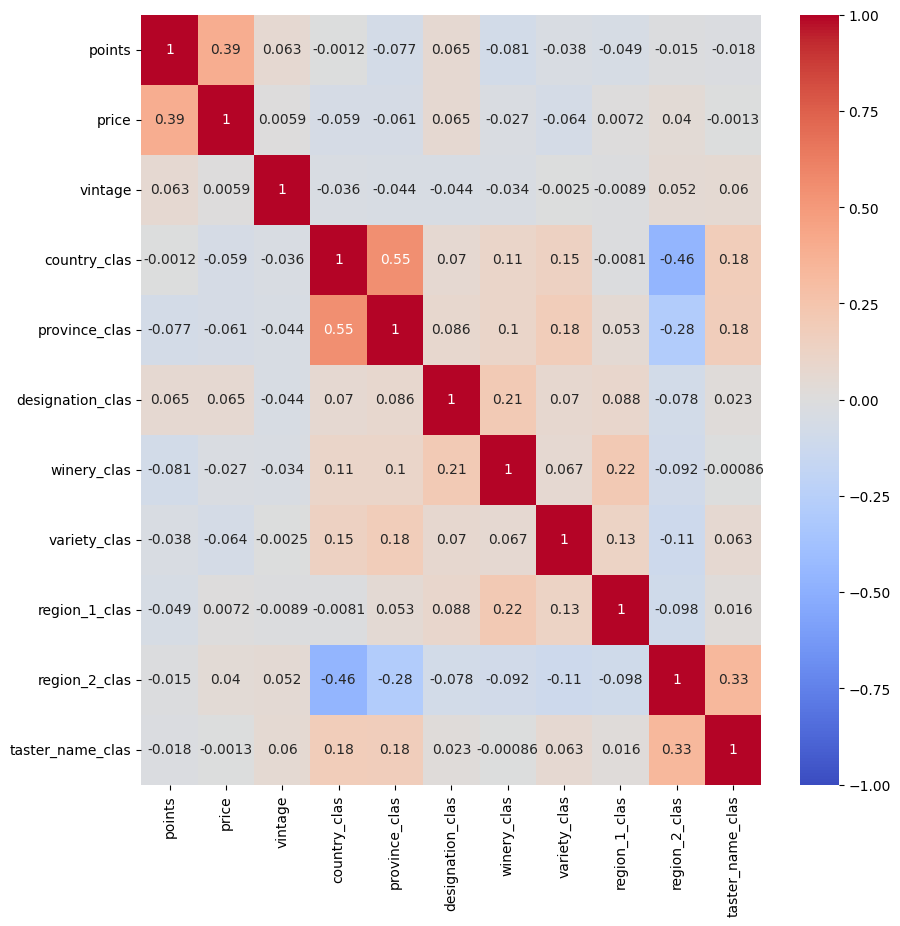

In [112]:
plt.figure(figsize=(10,10))
sns.heatmap(wine_rev2.corr(numeric_only=True), annot=True, vmin=-1, cmap="coolwarm")

## DS definitivo. Filtro del dataset por los vinos españoles únicamente

In [180]:
esp = wine_rev2[wine_rev2["country"]== "Spain"]

In [181]:
esp.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_photo,...,vintage,winery,country_clas,province_clas,designation_clas,winery_clas,variety_clas,region_1_clas,region_2_clas,taster_name_clas
51,Spain,Ripe pure black-fruit aromas are touched up by...,Prestigio Pago de las Solanas,94,NaN,Northern Spain,Ribera del Duero,NaN,Michael Schachner,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,...,2010,Matarromera,10,20,24,49,22,29,-1,6
120,Spain,"A mix of earthy berry, cassis and leather arom...",Reserva Old Vines Unfiltered,91,90.0,Northern Spain,Rioja,NaN,Michael Schachner,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,...,2008,Remírez de Ganuza,10,20,73,117,42,57,-1,6
121,Spain,Richly oaked aromas of maple and mocha accent ...,Viña Coqueta,91,78.0,Northern Spain,Rioja,NaN,Michael Schachner,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,...,2008,Remírez de Ganuza,10,20,74,117,42,57,-1,6


taster_name = Michael Schachner
https://www.wineenthusiast.com/contributor/michael-schachner/?srsltid=AfmBOopteGo7yRLmJCN8_wn5HG74R4Sy78ZV_dJ-J0SvYBHBBFtOS7j4

In [182]:
esp = esp.dropna(subset=["price"])
esp = esp.dropna(axis=1,how="all")
esp = esp.drop(columns=(["country","country_clas", "taster_name", "taster_photo", "taster_twitter_handle", "region_2_clas", "taster_name_clas"]))

In [183]:
esp.head(10)

,description,designation,points,price,province,region_1,title,variety,vintage,winery,province_clas,designation_clas,winery_clas,variety_clas,region_1_clas
120,"A mix of earthy berry, cassis and leather arom...",Reserva Old Vines Unfiltered,91,90.0,Northern Spain,Rioja,Remírez de Ganuza 2008 Reserva Old Vines Unfil...,Tempranillo Blend,2008,Remírez de Ganuza,20,73,117,42,57
121,Richly oaked aromas of maple and mocha accent ...,Viña Coqueta,91,78.0,Northern Spain,Rioja,Remírez de Ganuza 2008 Viña Coqueta (Rioja),Tempranillo Blend,2008,Remírez de Ganuza,20,74,117,42,57
141,"Stone-fruit, orange peel and Ribeira Sacra's t...",Peza do Rei,89,21.0,Galicia,Ribeira Sacra,Adega Cachín 2015 Peza do Rei White (Ribeira S...,White Blend,2015,Adega Cachín,40,89,136,49,67
180,"Ripe raisiny aromas are soft, maybe to a fault...",NaN,88,20.0,Central Spain,Vino de la Tierra de Castilla,Ardales 2011 Tempranillo (Vino de la Tierra de...,Tempranillo,2011,Ardales,50,-1,172,57,79
185,"Slightly rustic earthy aromas of animal, black...",Barrica,88,16.0,Levante,Jumilla,Monterebro 2014 Barrica Monastrell-Syrah (Jumi...,Monastrell-Syrah,2014,Monterebro,52,119,177,59,81
321,"Jammy, slightly reduced aromas of blackberry a...",Altos de Losada La Bienquerida,92,55.0,Northern Spain,Bierzo,Losada 2011 Altos de Losada La Bienquerida Men...,Mencía,2011,Losada,20,205,303,79,130
322,"Dark aromas of graham cracker, blueberry, prun...",Altos de Losada Viñedos Viejos Pequeñas Parcelas,92,36.0,Northern Spain,Bierzo,Losada 2015 Altos de Losada Viñedos Viejos Peq...,Mencía,2015,Losada,20,206,303,79,130
350,"Gritty herbal aromas of olive, asphalt and com...",Celeste Crianza,88,21.0,Northern Spain,Ribera del Duero,Torres 2013 Celeste Crianza (Ribera del Duero),Tempranillo,2013,Torres,20,226,331,57,29
368,"Although this smells a bit oily, gritty and py...",Monte Palma,85,10.0,Northern Spain,Rueda,Bodegas Cerrosol 2015 Monte Palma Sauvignon Bl...,Sauvignon Blanc,2015,Bodegas Cerrosol,20,238,346,6,147
376,Grassy raspberry and cherry aromas are a bit l...,Junior,85,16.0,Catalonia,Montsant,Tossals 2014 Junior Red (Montsant),Rhône-style Red Blend,2014,Tossals,68,244,354,44,150


In [184]:
esp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3375 entries, 120 to 81063
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   description       3375 non-null   object 
 1   designation       2801 non-null   object 
 2   points            3375 non-null   int64  
 3   price             3375 non-null   float64
 4   province          3375 non-null   object 
 5   region_1          3375 non-null   object 
 6   title             3375 non-null   object 
 7   variety           3375 non-null   object 
 8   vintage           3375 non-null   int64  
 9   winery            3375 non-null   object 
 10  province_clas     3375 non-null   int64  
 11  designation_clas  3375 non-null   int64  
 12  winery_clas       3375 non-null   int64  
 13  variety_clas      3375 non-null   int64  
 14  region_1_clas     3375 non-null   int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 421.9+ KB


<Axes: >

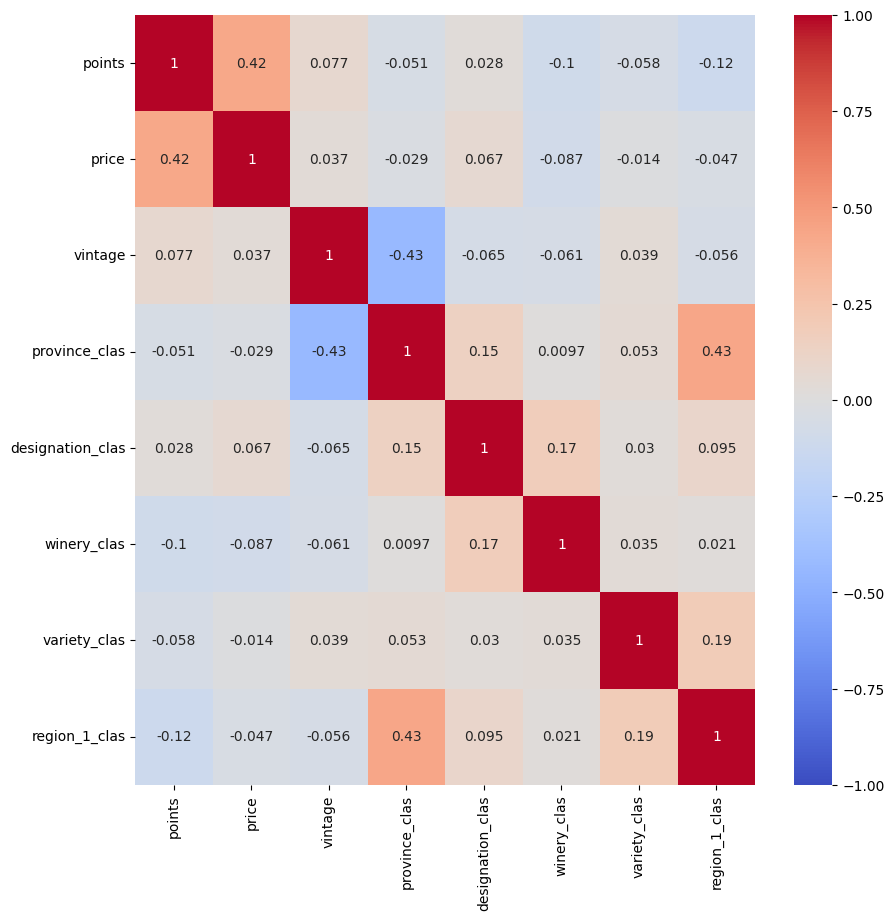

In [185]:
plt.figure(figsize=(10,10))
sns.heatmap(esp.corr(numeric_only=True), annot=True, vmin=-1, cmap="coolwarm")

## Test

In [153]:
X = esp[["points", "vintage", "winery_clas", "variety_clas", "designation_clas"]]
y = esp['price']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state=55)
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
rfc =xgboost.XGBRegressor(n_estimators=100,max_depth=6,learning_rate=0.1,objective='reg:squarederror',random_state=42)
rfc.fit(X_train_sc,y_train)
y_pred_train = rfc.predict(X_train_sc)
y_pred_test = rfc.predict(X_test_sc)
mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
print("train:", mae_train)
print("test:", mae_test)
print(rfc.feature_importances_)
print(*X_train.columns)


train: 6.516994762420654
test: 11.657910642977114
[0.40695965 0.17828023 0.18336011 0.1456779  0.08572217]
points vintage winery_clas variety_clas designation_clas
